In [1]:
#@title Imports
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import numpy as np
import math
import time

import matplotlib.pyplot as plt
from livelossplot import PlotLossesKeras

In [3]:
#@title Load Data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

dataset = datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = dataset.load_data()

# normalize and reshape data
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype("float32") / 255.0

x_train = x_train[:1000]
y_train= y_train[:1000]
x_test = x_test[:100]
y_test= y_test[:100]

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

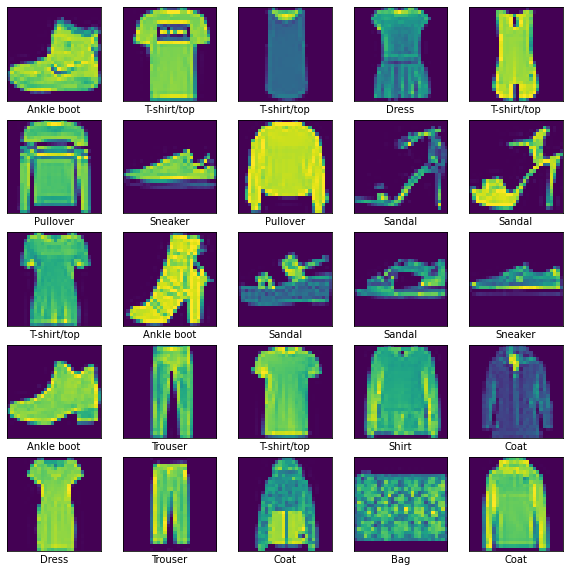

In [5]:
def plot_data(num_images, images, labels):
  grid = math.ceil(math.sqrt(num_images))
  plt.figure(figsize=(grid*2,grid*2))
  for i in range(num_images):
      plt.subplot(grid,grid,i+1)
      plt.xticks([])
      plt.yticks([])
      plt.grid(False)     
      plt.imshow(images[i].reshape(28,28))
      plt.xlabel(class_names[labels[i]])      
  plt.show()

plot_data(25, x_train, y_train)

In [6]:
#@title Create Model and CNN Layers
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2), padding="same"))
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding="same"))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 16)          4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 16)          0

In [7]:
#@title Flatten and Output Classes
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 16)          4624      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 16)          0

In [8]:
#@title Compile the Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

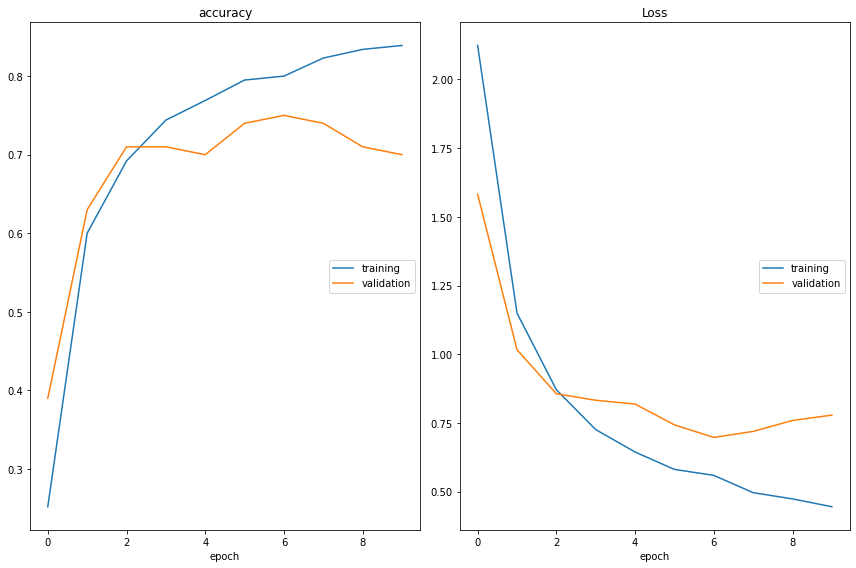

accuracy
	training         	 (min:    0.252, max:    0.839, cur:    0.839)
	validation       	 (min:    0.390, max:    0.750, cur:    0.700)
Loss
	training         	 (min:    0.445, max:    2.124, cur:    0.445)
	validation       	 (min:    0.697, max:    1.582, cur:    0.778)


In [9]:
#@title Train the Model
history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test),
                    callbacks=[PlotLossesKeras()],
                    verbose=0)

In [10]:
#@title Evaluate Final Accuracy on Test
test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

4/4 - 0s - loss: 0.7782 - accuracy: 0.7000 - 23ms/epoch - 6ms/step


SECTION 7.1.1


In [ ]:
#@title Reduce the number of CNN layers
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(28, 28, 1)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 flatten_1 (Flatten)         (None, 50176)             0         
                                                                 
 dense_2 (Dense)             (None, 128)               6422656   
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 6,424,586
Trainable params: 6,424,586
Non-trainable params: 0
_________________________________________________________________


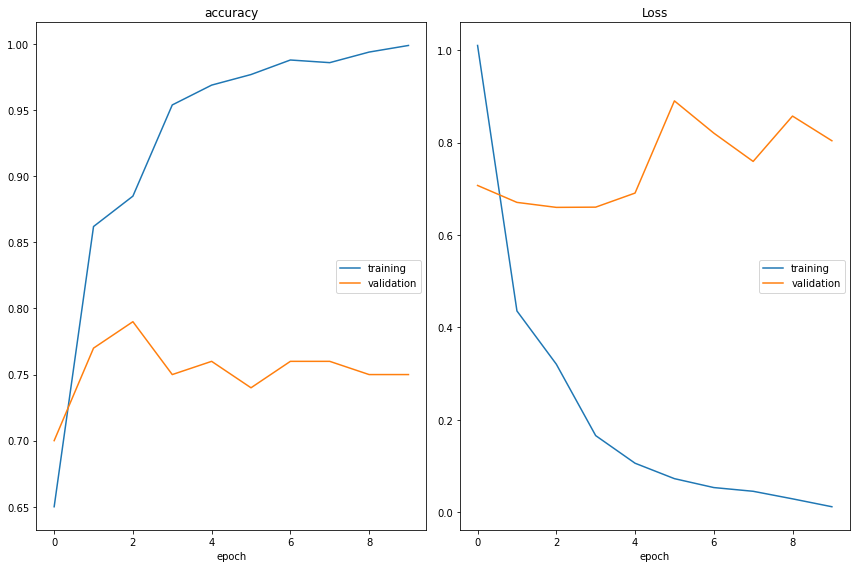

accuracy
	training         	 (min:    0.650, max:    0.999, cur:    0.999)
	validation       	 (min:    0.700, max:    0.790, cur:    0.750)
Loss
	training         	 (min:    0.012, max:    1.010, cur:    0.012)
	validation       	 (min:    0.660, max:    0.890, cur:    0.804)


In [ ]:
#@title Compile and Train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test),
                    callbacks=[PlotLossesKeras()],
                    verbose=0)

In [ ]:
#@title Revising the model
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding="same", input_shape=(28, 28, 1)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2), padding="same"))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 12544)             0         
                                                                 
 dense_4 (Dense)             (None, 128)               1605760   
                                                                 
 dense_5 (Dense)             (None, 10)               

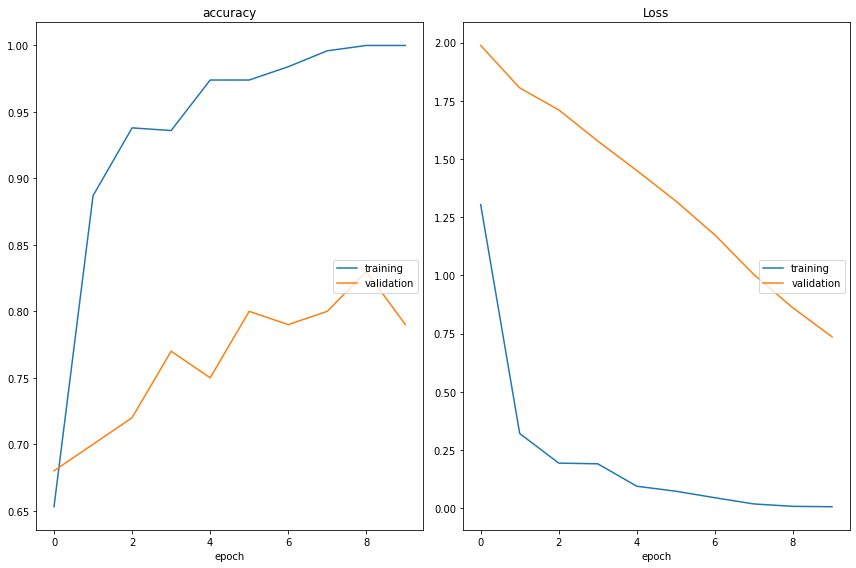

accuracy
	training         	 (min:    0.653, max:    1.000, cur:    1.000)
	validation       	 (min:    0.680, max:    0.830, cur:    0.790)
Loss
	training         	 (min:    0.006, max:    1.304, cur:    0.006)
	validation       	 (min:    0.736, max:    1.988, cur:    0.736)


In [ ]:
#@title Compile and Train the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=10, 
                    validation_data=(x_test, y_test),
                    callbacks=[PlotLossesKeras()],
                    verbose=0)